# Linear Regression Simple

I going to use sciki-learn for implement a linear regression simple, I have a dataset with data about consume of fuel and carbon dioxide emission of cars. later I going to separate the data in a set of training that going to be evaluated using a set test for finally use the model for predict unknown values

### Import necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline
import urllib.request

### Download dataset

In [8]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'
filename = 'FuelConsumptionCo2.csv'
urllib.request.urlretrieve(url, filename)

('FuelConsumptionCo2.csv', <http.client.HTTPMessage at 0x1b565de9be0>)

## Understanding the Data

* MODELYEAR e.g. 2014
* MAKE e.g. Acura
* MODEL e.g. ILX
* VEHICLE CLASS e.g. SUV
* ENGINE SIZE e.g. 4.7
* CYLINDERS e.g 6
* TRANSMISSION e.g. A6
* FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
* FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
* FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
* CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

## Read Dataset

In [9]:
df=pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Eploratory Data Analysis

For have a better knowledge of the dataset, first I need to describe.

In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select some characteristics for get  better detail

In [14]:
new_df=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS",]]
new_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


<Figure size 1080x1080 with 0 Axes>

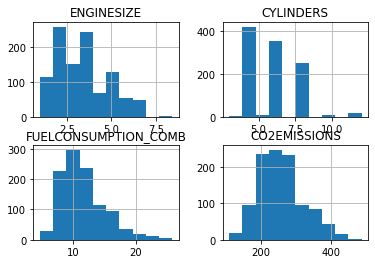

In [19]:
plt.figure(figsize=(15,15))
new_df.hist()
plt.show()

Text(0.5, 1.0, 'COMPARATIVE')

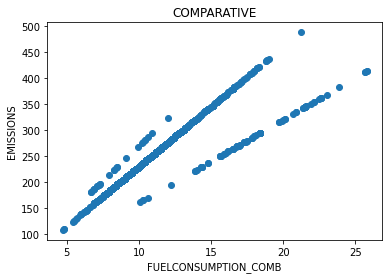

In [28]:
plt.scatter(new_df.FUELCONSUMPTION_COMB,new_df.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSIONS")
plt.title("COMPARATIVE")

Text(0.5, 1.0, 'COMPARATIVE')

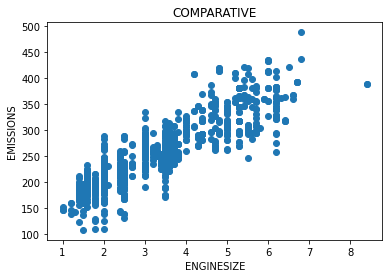

In [27]:
plt.scatter(new_df.ENGINESIZE,new_df.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.title("COMPARATIVE")

Text(0.5, 1.0, 'COMPARATIVE')

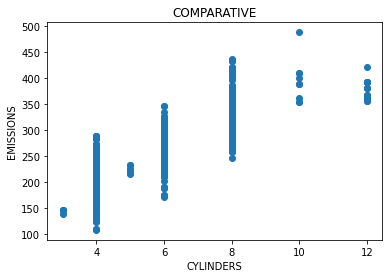

In [26]:
plt.scatter(new_df.CYLINDERS,new_df.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSIONS")
plt.title("COMPARATIVE")

## Create a set of data for train/test

In [30]:
msk=np.random.rand(len(df))<0.8
train=new_df[msk]
test=new_df[~msk]

In [32]:
print(f'train: ',train)
print(f'test: ',test)

train:        ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[853 rows x 4 columns]
test:        ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
5            3.5          6                  10.0           230
7            3.7          6                  11.1           255
8

## Simple Regression Model

Train the data distribution

Text(0.5, 1.0, 'COMPARATIVE')

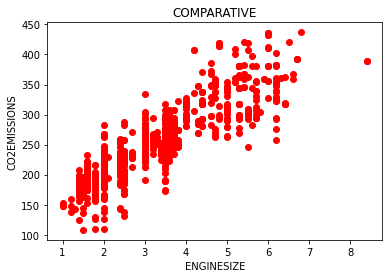

In [37]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="Red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.title("COMPARATIVE")

## MODELING

Using the library sklearn for model the train data

In [38]:
from sklearn import linear_model

In [39]:
lreg=linear_model.LinearRegression()

In [43]:
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

In [44]:
lreg.fit(train_x,train_y)

LinearRegression()

Show the coefficients

In [47]:
print(f'Coefficients θ1: ',lreg.coef_)
print(f'Intercept θ0: ',lreg.intercept_)

Coefficients θ1:  [[39.13263109]]
Intercept θ0:  [125.0039905]


θ0 and θ1 are parameters from straight fit  because is a simple linear regression with only 2 parameters knowing that this parameters are the intersection and slope of the line
sklearn can estimate direclty by data.

Text(0.5, 1.0, 'COMPARATIVE')

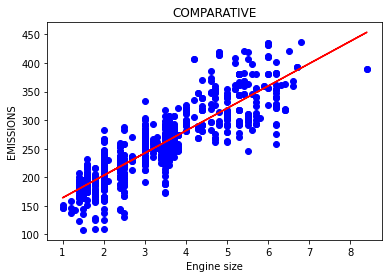

In [57]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
#set the fit line
plt.plot(train_x,lreg.coef_[0][0]*train_x+lreg.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("EMISSIONS")
plt.title("COMPARATIVE")

## EVALUATION

Comparative of actual values and predicted for calculate the accuracy of the regression model. there are different metrics for evaluate the model.
I going to use MSE for calculate the accuracy of the model based on the test set.

In [58]:
from sklearn.metrics import r2_score

In [59]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [64]:
test_y_=lreg.predict(test_x)

In [65]:
print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 0.00
Suma residual de los cuadrados (MSE): 0.00
R2-score: 1.00


Other easy way to make a simple linear regression

https://github.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020/blob/master/Sesion-04/Ejemplo-05/regresion_lineal_simple.ipynb